In [24]:
import torch
from anarx import ANARX, subnet
from utilities import lag_matrix
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import scipy.io


In [25]:
model = torch.load("anarxreal1603_1000it.pt")
mat = scipy.io.loadmat('data/miso')
u1 = mat['u1_v']
u2 = mat['u2_v']
y = mat['y_v']

In [26]:
u1 = torch.squeeze(torch.from_numpy(u1).float())
u2 = torch.squeeze(torch.from_numpy(u2).float())
y = torch.squeeze(torch.from_numpy(y).float())
lagged_u1 = lag_matrix(u1, model.nlags)
lagged_u2 = lag_matrix(u2, model.nlags)

# inputs = torch.from_numpy(uin)
# outputs = torch.from_numpy(yout)
# lagged_inputs = lag_matrix(inputs, model.nlags)


In [27]:

y_hat = torch.zeros_like(u1)
lags = model.initLags()
# Predict whole Dataset
for i in range(len(u1)):
    y_hat[i] = model(lagged_u1[i], lagged_u2[i], lags)
    lags = torch.roll(lags, 1, 0)
    lags[0] = y_hat[i]
# plt.plot(y_hat.detach().numpy())
# plt.plot(y)
# plt.show()

In [28]:
# list(model.fc.parameters())[0][0][1]

In [29]:
# w0 = list(model.fc.parameters())[0][0][0]
# w1 = list(model.fc.parameters())[0][0][1]
# w2 = list(model.fc.parameters())[0][0][2]

In [30]:
x = torch.zeros(model.nlags).float()
#u1_t = torch.from_numpy(u1).float()
#u2_t = torch.from_numpy(u2).float()

def nextState(x, u1, u2):
    next = torch.zeros(model.nlags)
    for i in range(model.nlags-1):
        next[i] = x[i+1] + model.subnets[i](torch.cat((torch.unsqueeze(u1, 0),torch.unsqueeze(u2, 0), torch.unsqueeze(x[0], 0))))
    next[model.nlags-1] =  model.subnets[model.nlags - 1](torch.cat((torch.unsqueeze(u1, 0),torch.unsqueeze(u2, 0), torch.unsqueeze(x[0], 0))))
    return next
y = []
for i in range(12000):
    y.append(x[0].detach().numpy())
    x = nextState(x, u1[i],u2[i])

y(t) = N1(y(t-1), u(t-1)) + N2(y(t-2), u(t-2)) + N3(y(t-3), u(t-3))
x1(t) = N2(y(t-1), u(t-1)) + N3(y(t-2), u(t-2))
x2(t) = N3(y(t-1), u(t-1))

In [31]:
out = torch.zeros(1000)
for step in range(1000):
    for lag in range(model.nlags):
        out[step] = out[step] + model.subnets[lag](torch.cat((torch.unsqueeze(u_t[step-lag], 0), torch.unsqueeze(out[step-lag-1], 0))))

NameError: name 'u_t' is not defined

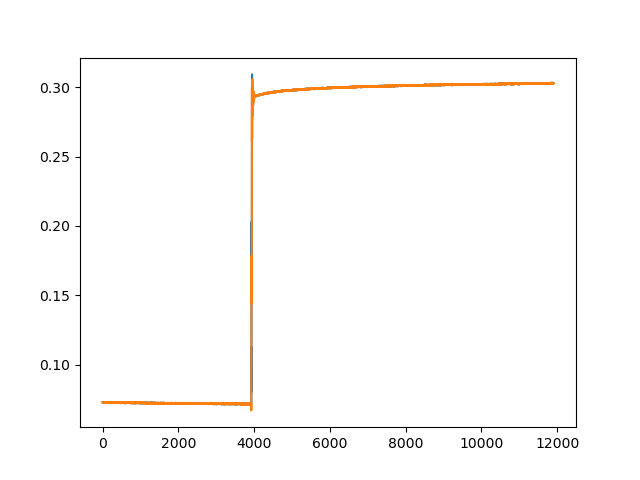

In [32]:
plt.plot(y[100:]) # statespace
# plt.plot(out.detach().numpy()[100:]) # version 2
# plt.plot(x2)
# plt.plot(x3)
# plt.plot(outputs)
plt.plot(y_hat.detach().numpy()[100:]) #Netzausgang
plt.show()